# Artificial Intelligence Mini Project - AZ5411 

## AI Powered Alchemy - Poorna prakash S, Srilakshmi H and Thanya Gayathri N

## Review 2

### Importing the Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from rdkit import Chem
from rdkit.Chem import AllChem
import torch
import torch.nn as nn
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool

C:\Users\Sri Lakshmi\anaconda3\envs\Sri\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Reading the HIV Dataset

In [2]:
df=pd.read_csv('HIV.csv')

### Summary Statistics

In [3]:
df.head()

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0


In [4]:
df.shape

(41127, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41127 entries, 0 to 41126
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   smiles      41127 non-null  object
 1   activity    41127 non-null  object
 2   HIV_active  41127 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 964.0+ KB


In [6]:
df.isnull().sum()

smiles        0
activity      0
HIV_active    0
dtype: int64

In [7]:
df['HIV_active'].value_counts()

HIV_active
0    39684
1     1443
Name: count, dtype: int64

### Taking only the rows which has HIV Active value '0'

In [8]:
# Filtering rows where hiv_active is 0
hiv_0 = df[df['HIV_active'] == 0]

# Displaying the first few rows of the filtered DataFrame
print(hiv_0.head())

# Saving this filtered DataFrame to a new CSV file
hiv_0.to_csv('HIV_active_0.csv', index=False)

                                              smiles activity  HIV_active
0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...       CI           0
1  C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...       CI           0
2                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21       CI           0
3    Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1       CI           0
4                             O=S(=O)(O)CCS(=O)(=O)O       CI           0


In [9]:
hiv_0.shape

(39684, 3)

In [10]:
# Load your dataset and filter rows where hiv_active is 0
hiv_data = pd.read_csv('HIV.csv')
hiv_active_0_df = hiv_data[hiv_data['HIV_active'] == 0]

# Ensure the index is reset
hiv_active_0_df = hiv_active_0_df.reset_index(drop=True)

# Extract SMILES data
smiles_data = hiv_active_0_df['smiles'].tolist()

### Generative Adversarial Network

C:\Users\Sri Lakshmi\anaconda3\envs\Sri\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
[13:31:58] WARNING: not removing hydrogen atom without neighbors
[13:31:58] WARNING: not removing hydrogen atom without neighbors


Epoch 1, Generator Loss: 1.3804569983443968, Discriminator Loss: 1.231973798090709


[13:33:00] WARNING: not removing hydrogen atom without neighbors
[13:33:00] WARNING: not removing hydrogen atom without neighbors


Epoch 2, Generator Loss: 2.3268514537580924, Discriminator Loss: 1.1362646917981993


[13:34:20] WARNING: not removing hydrogen atom without neighbors
[13:34:20] WARNING: not removing hydrogen atom without neighbors


Epoch 3, Generator Loss: 2.6078132536868157, Discriminator Loss: 1.1286912261000002


[13:35:36] WARNING: not removing hydrogen atom without neighbors
[13:35:36] WARNING: not removing hydrogen atom without neighbors


Epoch 4, Generator Loss: 2.8386279859020704, Discriminator Loss: 1.0295928932618403


[13:36:54] WARNING: not removing hydrogen atom without neighbors
[13:36:54] WARNING: not removing hydrogen atom without neighbors


Epoch 5, Generator Loss: 2.9938620745463838, Discriminator Loss: 0.9368315190796691


[13:37:45] WARNING: not removing hydrogen atom without neighbors
[13:37:45] WARNING: not removing hydrogen atom without neighbors


Epoch 6, Generator Loss: 3.1933038772208295, Discriminator Loss: 0.8276202130144921


[13:38:25] WARNING: not removing hydrogen atom without neighbors
[13:38:25] WARNING: not removing hydrogen atom without neighbors


Epoch 7, Generator Loss: 3.4431609159122534, Discriminator Loss: 0.7170990621026203


[13:39:38] WARNING: not removing hydrogen atom without neighbors
[13:39:38] WARNING: not removing hydrogen atom without neighbors


Epoch 8, Generator Loss: 3.7084090548437, Discriminator Loss: 0.6460632427015166


[13:41:19] WARNING: not removing hydrogen atom without neighbors
[13:41:19] WARNING: not removing hydrogen atom without neighbors


Epoch 9, Generator Loss: 3.98780959047941, Discriminator Loss: 0.5925701685285799


[13:42:04] WARNING: not removing hydrogen atom without neighbors
[13:42:04] WARNING: not removing hydrogen atom without neighbors


Epoch 10, Generator Loss: 4.3114832184740886, Discriminator Loss: 0.5070638861057263


[13:43:32] WARNING: not removing hydrogen atom without neighbors
[13:43:32] WARNING: not removing hydrogen atom without neighbors


Epoch 11, Generator Loss: 4.813146977033016, Discriminator Loss: 0.5243508648157311


[13:44:16] WARNING: not removing hydrogen atom without neighbors
[13:44:16] WARNING: not removing hydrogen atom without neighbors


Epoch 12, Generator Loss: 4.9933428576219105, Discriminator Loss: 0.47122304182313685


[13:45:08] WARNING: not removing hydrogen atom without neighbors
[13:45:08] WARNING: not removing hydrogen atom without neighbors


Epoch 13, Generator Loss: 5.584208987569271, Discriminator Loss: 0.43382153532883205


[13:46:07] WARNING: not removing hydrogen atom without neighbors
[13:46:07] WARNING: not removing hydrogen atom without neighbors


Epoch 14, Generator Loss: 5.693637637892399, Discriminator Loss: 0.4724471526709348


[13:46:52] WARNING: not removing hydrogen atom without neighbors
[13:46:52] WARNING: not removing hydrogen atom without neighbors


Epoch 15, Generator Loss: 5.562051806472926, Discriminator Loss: 0.3991257009394887


[13:48:39] WARNING: not removing hydrogen atom without neighbors
[13:48:39] WARNING: not removing hydrogen atom without neighbors


Epoch 16, Generator Loss: 5.654818088728065, Discriminator Loss: 0.35131021413874125


[13:49:12] WARNING: not removing hydrogen atom without neighbors
[13:49:12] WARNING: not removing hydrogen atom without neighbors


Epoch 17, Generator Loss: 6.0681722862900935, Discriminator Loss: 0.40208055532496906


[13:50:16] WARNING: not removing hydrogen atom without neighbors
[13:50:16] WARNING: not removing hydrogen atom without neighbors


Epoch 18, Generator Loss: 5.654908277754238, Discriminator Loss: 0.44517001919988275


[13:51:17] WARNING: not removing hydrogen atom without neighbors
[13:51:17] WARNING: not removing hydrogen atom without neighbors


Epoch 19, Generator Loss: 5.745065247954954, Discriminator Loss: 0.37837471803365313


[13:52:21] WARNING: not removing hydrogen atom without neighbors
[13:52:21] WARNING: not removing hydrogen atom without neighbors


Epoch 20, Generator Loss: 6.010320388560518, Discriminator Loss: 0.3423927021385343


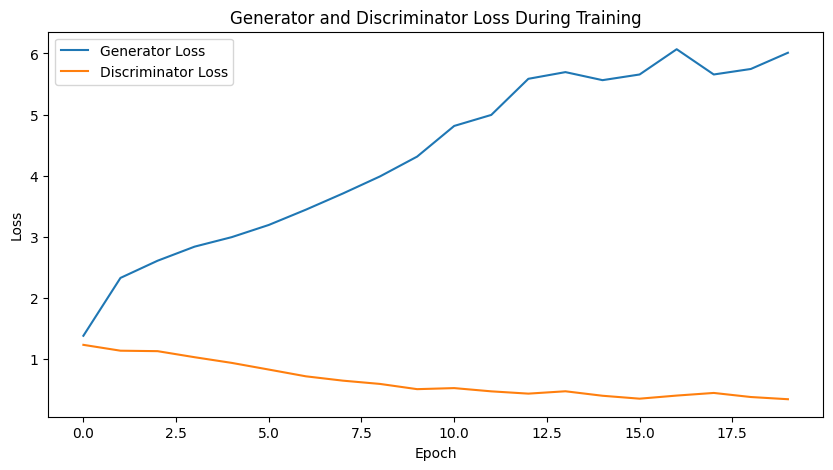

In [11]:
import matplotlib.pyplot as plt
# Custom Dataset class for SMILES
class SMILESDataset(Dataset):
    def __init__(self, smiles_list):
        self.smiles_list = smiles_list

    def __len__(self):
        return len(self.smiles_list)

    def __getitem__(self, idx):
        return self.smiles_list[idx]

# Define the Generator architecture for SMILES
class Generator(nn.Module):
    def __init__(self, latent_size, output_size):
        super(Generator, self).__init__()
        self.latent_size = latent_size
        self.output_size = output_size

        self.model = nn.Sequential(
            nn.Linear(latent_size, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_size)
        )

    def forward(self, z):
        return self.model(z)

# Define the Discriminator architecture for SMILES
class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()
        self.input_size = input_size

        self.model = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Define training function for GAN
def train_gan(generator, discriminator, dataloader, g_optimizer, d_optimizer, criterion, num_epochs=10):
    generator.train()
    discriminator.train()
    
    g_losses = []
    d_losses = []
    
    for epoch in range(num_epochs):
        g_running_loss = 0.0
        d_running_loss = 0.0
        
        for smiles in dataloader:
            real_smiles = smiles_to_tensor(smiles).to(device)
            
            # Train discriminator with real data
            d_optimizer.zero_grad()
            real_output = discriminator(real_smiles)
            real_labels = torch.ones(real_smiles.size(0), 1).to(device)
            d_real_loss = criterion(real_output, real_labels)
            
            # Train discriminator with fake data
            latent_samples = torch.randn(real_smiles.size(0), latent_size).to(device)
            fake_smiles = generator(latent_samples)
            fake_output = discriminator(fake_smiles.detach())
            fake_labels = torch.zeros(real_smiles.size(0), 1).to(device)
            d_fake_loss = criterion(fake_output, fake_labels)
            
            # Update discriminator weights
            d_loss = d_real_loss + d_fake_loss
            d_loss.backward()
            d_optimizer.step()
            d_running_loss += d_loss.item()
            
            # Train generator
            g_optimizer.zero_grad()
            fake_output = discriminator(fake_smiles)
            g_loss = criterion(fake_output, real_labels)
            g_loss.backward()
            g_optimizer.step()
            g_running_loss += g_loss.item()
        
        g_losses.append(g_running_loss / len(dataloader))
        d_losses.append(d_running_loss / len(dataloader))
        
        print(f'Epoch {epoch+1}, Generator Loss: {g_running_loss / len(dataloader)}, Discriminator Loss: {d_running_loss / len(dataloader)}')
    
    return g_losses, d_losses

# Function to convert SMILES to tensor
def smiles_to_tensor(smiles_list, max_length=100):
    tensor_list = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
            fingerprint = np.array(fingerprint).astype(float)
            tensor_list.append(torch.from_numpy(fingerprint).float())
    padded_tensor = nn.utils.rnn.pad_sequence(tensor_list, batch_first=True, padding_value=0)
    return padded_tensor

# Example SMILES data
latent_size = 100
output_size = 1024
batch_size = 64
learning_rate = 0.0002
num_epochs = 20

# Create dataset and dataloader
dataset = SMILESDataset(smiles_data)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize Generator and Discriminator
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator(latent_size, output_size).to(device)
discriminator = Discriminator(output_size).to(device)

# Define optimizers and criterion
g_optimizer = optim.RMSprop(generator.parameters(), lr=learning_rate)
d_optimizer = optim.RMSprop(discriminator.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

# Train the GAN and get the loss values
g_losses, d_losses = train_gan(generator, discriminator, dataloader, g_optimizer, d_optimizer, criterion, num_epochs=num_epochs)

# Plot the loss values
plt.figure(figsize=(10, 5))
plt.plot(g_losses, label='Generator Loss')
plt.plot(d_losses, label='Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Generator and Discriminator Loss During Training')
plt.legend()
plt.show()

# Save the trained generator weights
torch.save(generator.state_dict(), 'generator_model.pth')

### Generating the new molecules (SMILES Strings) in Tensor format

In [22]:
# Set the generator in evaluation mode
generator.eval()
generated=[]
# Number of molecules to generate
num_molecules = 20

# Generate random latent vectors
latent_vectors = torch.randn(num_molecules, latent_size)

# Pass latent vectors through the generator
with torch.no_grad():
    generated_molecules = generator(latent_vectors)

# Print the generated SMILES strings
for i, smiles in enumerate(generated_molecules):
    print(f"Molecule {i+1}: {smiles}")
    generated.append(smiles)

Molecule 1: tensor([-0.0677, -0.0459, -0.0834,  ..., -0.2050,  0.1461, -0.1515])
Molecule 2: tensor([ 0.0487,  0.1777, -0.0675,  ..., -0.1175,  0.1146, -0.1391])
Molecule 3: tensor([-0.1716,  0.1130, -0.1564,  ..., -0.0305,  0.0358,  0.1451])
Molecule 4: tensor([-0.0302,  0.1131, -0.1373,  ..., -0.2560,  0.0314, -0.0318])
Molecule 5: tensor([-0.1200, -0.0981,  0.0116,  ..., -0.0987, -0.0013, -0.0522])
Molecule 6: tensor([-0.0341,  0.0283, -0.0030,  ...,  0.0615,  0.0712,  0.0300])
Molecule 7: tensor([-0.0999,  0.0414, -0.2229,  ...,  0.0148,  0.0968,  0.0252])
Molecule 8: tensor([ 0.3200, -0.2771, -0.0130,  ..., -0.0088,  0.0640,  0.0085])
Molecule 9: tensor([-0.0121, -0.0029, -0.0512,  ...,  0.0534,  0.0804, -0.0319])
Molecule 10: tensor([-0.2266,  0.0638, -0.0005,  ..., -0.0629, -0.1181, -0.1157])
Molecule 11: tensor([ 0.0763, -0.1118, -0.0599,  ..., -0.1267, -0.0117, -0.0022])
Molecule 12: tensor([-0.3968, -0.2031, -0.3151,  ...,  0.0236, -0.0268,  0.0764])
Molecule 13: tensor([ 0.2

### Normalizing the Molecular Tensor obtained

In [13]:
# Function to perform min-max scaling normalization
def min_max_scaling(tensor):
    min_val = tensor.min()
    max_val = tensor.max()
    scaled_tensor = (tensor - min_val) / (max_val - min_val)
    return scaled_tensor

# Normalize each molecular tensor using min-max scaling
normalized_molecule_tensors = [min_max_scaling(tensor) for tensor in generated]

# Print the normalized tensors
for i, tensor in enumerate(normalized_molecule_tensors, start=1):
    print(f"Molecule {i} (normalized): {tensor}")

Molecule 1 (normalized): tensor([0.2192, 0.1492, 0.1058,  ..., 0.1161, 0.1606, 0.1026])
Molecule 2 (normalized): tensor([0.2128, 0.2591, 0.1704,  ..., 0.1772, 0.1987, 0.2494])
Molecule 3 (normalized): tensor([0.1634, 0.1908, 0.2055,  ..., 0.2639, 0.2857, 0.1669])
Molecule 4 (normalized): tensor([0.2309, 0.2150, 0.2851,  ..., 0.3161, 0.2631, 0.2803])
Molecule 5 (normalized): tensor([0.1893, 0.2014, 0.1090,  ..., 0.1597, 0.1065, 0.2532])
Molecule 6 (normalized): tensor([0.2437, 0.2252, 0.2938,  ..., 0.1442, 0.3237, 0.0622])
Molecule 7 (normalized): tensor([0.2139, 0.1787, 0.1218,  ..., 0.2727, 0.2236, 0.2668])
Molecule 8 (normalized): tensor([0.2756, 0.3817, 0.2209,  ..., 0.1923, 0.4677, 0.2011])
Molecule 9 (normalized): tensor([0.1872, 0.2933, 0.1343,  ..., 0.1401, 0.2350, 0.2702])
Molecule 10 (normalized): tensor([0.1848, 0.2159, 0.2173,  ..., 0.2522, 0.3003, 0.0803])
Molecule 11 (normalized): tensor([0.0881, 0.2070, 0.2268,  ..., 0.1744, 0.3253, 0.0239])
Molecule 12 (normalized): tens

### Reading the Tox21 Dataset to perform the Test for Toxicity

### ADME - Absorption, Distribution, Metabolism and Excretion Properties - Text for Toxicity

In [15]:
tox = pd.read_csv('tox21.csv')
tox.head()

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O


In [16]:
tox.shape

(7831, 14)

In [126]:
tox.columns

Index(['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD',
       'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53',
       'mol_id', 'smiles'],
      dtype='object')

In [17]:
# Sample 30% of the rows
tox_30 = tox.sample(frac=0.3, random_state=42)  # 30% sample
print(f"Sampled DataFrame with 30% rows: {tox_30.shape}")

Sampled DataFrame with 30% rows: (2349, 14)


### Converting the SMILES format into Molecular Fingerprint

In [18]:
def smiles_to_fingerprint(smiles, radius=2, num_bits=2048):
    """
    Convert a SMILES string to a Morgan fingerprint.

    Parameters:
        smiles (str): The SMILES string of the molecule.
        radius (int): The radius of the circular fingerprint.
        num_bits (int): The length of the fingerprint vector.

    Returns:
        fingerprint (numpy.ndarray or None): The Morgan fingerprint as a binary vector,
            or None if the input SMILES string is invalid.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    # Check for NaN values in the molecule
    if np.isnan(radius) or np.isnan(num_bits):
        return None

    # Generate Morgan fingerprint
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=num_bits)

    # Convert the binary fingerprint to a numpy array
    fingerprint_array = np.zeros((1,))
    Chem.DataStructs.ConvertToNumpyArray(fingerprint, fingerprint_array)

    return fingerprint_array

# Example usage:
smiles = tox_30['smiles']  # Example SMILES string
fingerprint = [smiles_to_fingerprint(smile) for smile in smiles]
#print(f'Fingerprint for {smiles}: {fingerprint}')
normalized_fingerprint= [min_max_scaling(tensor) for tensor in fingerprint]

### Normalizing the Fingerprint array

In [19]:
print(normalized_fingerprint)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 1., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 1., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 

### Saving the Normalized fingerprints to a csv file

In [20]:
fingerprint_df = pd.DataFrame(np.vstack(normalized_fingerprint))

# Save the DataFrame to a CSV file
fingerprint_df.to_csv('normalized_fingerprints.csv', index=False)
print("Normalized fingerprints saved to 'normalized_fingerprints.csv'")

Normalized fingerprints saved to 'normalized_fingerprints.csv'


In [27]:
t50 = tox_30.head(50)
t50.shape

(50, 14)

In [28]:
s = t50['smiles']  # Example SMILES string
f = [smiles_to_fingerprint(smile) for smile in s]
#print(f'Fingerprint for {smiles}: {fingerprint}')
norm_f= [min_max_scaling(tensor) for tensor in f]

In [29]:
print(norm_f)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 1., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 1., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 

### Convert SMILES to 3D Structures and Save as PDB Files

In [30]:
# Create 3D structures and save as PDB files
for i, smile in enumerate(s):
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol)
        AllChem.UFFOptimizeMolecule(mol)
        Chem.MolToPDBFile(mol, f'molecule_{i}.pdb')

[14:36:36] UFFTYPER: Unrecognized charge state for atom: 1
[14:36:36] UFFTYPER: Unrecognized charge state for atom: 1


### Create a PyMOL Script to Load and Annotate Molecules

In [31]:
# Create a PyMOL script to load and annotate molecules
with open('visualize_fingerprints.pml', 'w') as f:
    for i in range(len(smiles)):
        f.write(f'load molecule_{i}.pdb, molecule_{i}\n')
        # Example: color by the sum of fingerprint values
        sum_fp = np.sum(normalized_fingerprint[i])
        color = 'red' if sum_fp > 0.5 else 'blue'
        f.write(f'color {color}, molecule_{i}\n')
        f.write(f'label molecule_{i}, "Fingerprint: {sum_fp}"\n')

print("PyMOL script 'visualize_fingerprints.pml' created")

PyMOL script 'visualize_fingerprints.pml' created


### Run the PyMOL Script

#### Load the script in PyMOL to visualize and annotate the molecules.

In [121]:
#pymol visualize_fingerprints.pml

### Recurrent Neural Networks and Convolutional Neural Networks for AMDE 

#### Performing data sampling of the Tox21.csv

In [104]:
# Sample 30% of the rows
tox_30 = tox.sample(frac=0.3, random_state=42)  # 30% sample
print(f"Sampled DataFrame with 30% rows: {tox_30.shape}")

Sampled DataFrame with 30% rows: (2349, 14)


In [105]:
tox_30.isnull().sum()

NR-AR            189
NR-AR-LBD        328
NR-AhR           394
NR-Aromatase     620
NR-ER            505
NR-ER-LBD        274
NR-PPAR-gamma    432
SR-ARE           584
SR-ATAD5         227
SR-HSE           406
SR-MMP           606
SR-p53           312
mol_id             0
smiles             0
dtype: int64

In [106]:
tox_30['NR-AR'].value_counts()

NR-AR
0.0    2068
1.0      92
Name: count, dtype: int64

#### Filling null values so that it remains as a discrete variable

In [110]:
tox_30['NR-AR'].fillna(1)

1142    1.0
4567    0.0
2592    0.0
1677    0.0
4958    0.0
       ... 
5317    0.0
4953    0.0
605     0.0
4503    0.0
5926    1.0
Name: NR-AR, Length: 2349, dtype: float64

In [111]:
tox_30['NR-AR'].isnull().sum()

0

### Recurrent Neural Network Model 

C:\Users\Sri Lakshmi\AppData\Local\Temp\ipykernel_29008\4075959501.py:37: RuntimeWarning: invalid value encountered in divide
  fingerprints = (fingerprints - fingerprints.mean(axis=0)) / fingerprints.std(axis=0)


Epoch 1, Loss: nan
Epoch 2, Loss: nan
Epoch 3, Loss: nan
Epoch 4, Loss: nan
Epoch 5, Loss: nan
Epoch 6, Loss: nan
Epoch 7, Loss: nan
Epoch 8, Loss: nan
Epoch 9, Loss: nan
Epoch 10, Loss: nan
Epoch 11, Loss: nan
Epoch 12, Loss: nan
Epoch 13, Loss: nan
Epoch 14, Loss: nan
Epoch 15, Loss: nan
Epoch 16, Loss: nan
Epoch 17, Loss: nan
Epoch 18, Loss: nan
Epoch 19, Loss: nan
Epoch 20, Loss: nan
Accuracy: 0.8900


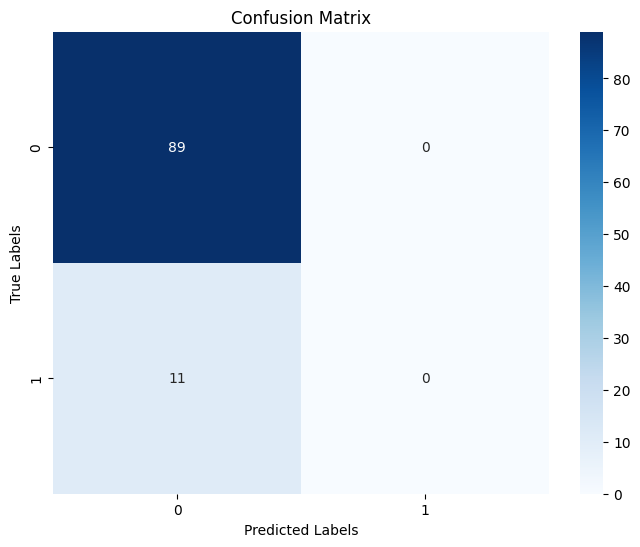

In [103]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use a subset of your dataset
tox_s = tox_30.head(100)

# Function to convert SMILES to molecular fingerprint
def smiles_to_fingerprint(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    arr = np.zeros((n_bits,))
    AllChem.DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Prepare data
fingerprints = []
labels = []
for smiles, label in zip(tox_s['smiles'], tox_s['NR-AR']):
    fp = smiles_to_fingerprint(smiles)
    if fp is not None:
        fingerprints.append(fp)
        labels.append(label)

# Normalize fingerprints
fingerprints = np.array(fingerprints)
fingerprints = (fingerprints - fingerprints.mean(axis=0)) / fingerprints.std(axis=0)

# Convert to PyTorch tensors
x = torch.tensor(fingerprints, dtype=torch.float)
y = torch.tensor(labels, dtype=torch.float).view(-1, 1)

# Custom dataset
class FingerprintDataset(Dataset):
    def __init__(self, fingerprints, labels):
        self.fingerprints = fingerprints
        self.labels = labels

    def __len__(self):
        return len(self.fingerprints)

    def __getitem__(self, idx):
        return self.fingerprints[idx], self.labels[idx]

# Create DataLoader
dataset = FingerprintDataset(x, y)
loader = DataLoader(dataset, batch_size=4, shuffle=True)  # Using batch_size=4 because we only have 4 samples

# Define RNN model
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(RNNModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(1, x.size(0), hidden_dim).to(x.device)
        c0 = torch.zeros(1, x.size(0), hidden_dim).to(x.device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

# Model training
input_dim = 2048
hidden_dim = 64
output_dim = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RNNModel(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCEWithLogitsLoss()

model.train()
for epoch in range(20):
    for data, labels in loader:
        data, labels = data.to(device), labels.to(device)
        data = data.unsqueeze(1)  # Adding sequence dimension
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Model evaluation
model.eval()
correct = 0
total = 0
all_labels = []
all_preds = []
with torch.no_grad():
    for data, labels in loader:
        data, labels = data.to(device), labels.to(device)
        data = data.unsqueeze(1)  # Adding sequence dimension
        out = model(data)
        pred = (out > 0).float()
        correct += (pred == labels).sum().item()
        total += labels.size(0)
        all_labels.append(labels.cpu().numpy().flatten())
        all_preds.append(pred.cpu().numpy().flatten())

accuracy = correct / total
print(f'Accuracy: {accuracy:.4f}')

# Flatten the lists
all_labels = np.concatenate(all_labels)
all_preds = np.concatenate(all_preds)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Convolutional Neural Network Model

[23:43:13] WARNING: not removing hydrogen atom without neighbors


Epoch 1, Loss: 0.04322783276438713
Epoch 2, Loss: 0.205398827791214
Epoch 3, Loss: 0.8682443499565125
Epoch 4, Loss: 0.29332175850868225
Epoch 5, Loss: 0.2918895184993744
Epoch 6, Loss: 0.17465031147003174
Epoch 7, Loss: 0.12374849617481232
Epoch 8, Loss: 0.3493194282054901
Epoch 9, Loss: 0.21619853377342224
Epoch 10, Loss: 0.7004871368408203
Epoch 11, Loss: 0.036099035292863846
Epoch 12, Loss: 0.24744382500648499
Epoch 13, Loss: 0.04793071001768112
Epoch 14, Loss: 0.19538356363773346
Epoch 15, Loss: 0.08805879205465317
Epoch 16, Loss: 0.08966990560293198
Epoch 17, Loss: 0.056523650884628296
Epoch 18, Loss: 0.02265394665300846
Epoch 19, Loss: 0.0005219474551267922
Epoch 20, Loss: 0.24693036079406738
Epoch 21, Loss: 0.06083940714597702
Epoch 22, Loss: 0.13642288744449615
Epoch 23, Loss: 3.0770304874749854e-05
Epoch 24, Loss: 0.02060748264193535
Epoch 25, Loss: 0.055520620197057724
Epoch 26, Loss: 0.0050428868271410465
Epoch 27, Loss: 0.0031629144214093685
Epoch 28, Loss: 0.0448756478726

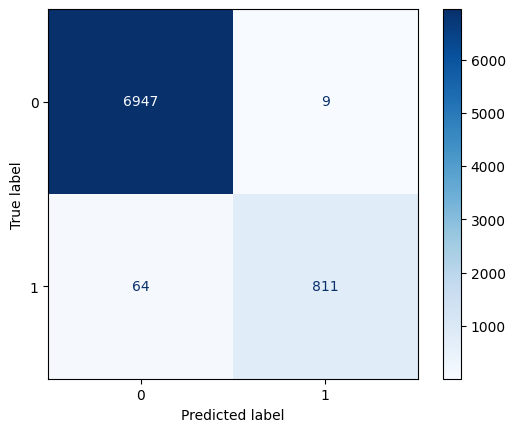

In [120]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to convert SMILES to molecular fingerprint
def smiles_to_fingerprint(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    arr = np.zeros((n_bits,))
    AllChem.DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Prepare data
fingerprints = []
labels = []
for smiles, label in zip(t['smiles'], t['NR-AR']):
    fp = smiles_to_fingerprint(smiles)
    if fp is not None:
        fingerprints.append(fp)
        labels.append(label)

# Normalize fingerprints
fingerprints = np.array(fingerprints)
fingerprints = (fingerprints - fingerprints.mean(axis=0)) / fingerprints.std(axis=0)

# Reshape fingerprints for CNN
fingerprints = fingerprints.reshape(-1, 1, 64, 32)  # Example reshape to (batch_size, channels, height, width)

# Convert to PyTorch tensors
x = torch.tensor(fingerprints, dtype=torch.float)
y = torch.tensor(labels, dtype=torch.float).view(-1, 1)

# Custom dataset
class FingerprintDataset(Dataset):
    def __init__(self, fingerprints, labels):
        self.fingerprints = fingerprints
        self.labels = labels

    def __len__(self):
        return len(self.fingerprints)

    def __getitem__(self, idx):
        return self.fingerprints[idx], self.labels[idx]

# Create DataLoader
dataset = FingerprintDataset(x, y)
loader = DataLoader(dataset, batch_size=8, shuffle=True)

# Define enhanced CNN model
class EnhancedCNNModel(nn.Module):
    def __init__(self):
        super(EnhancedCNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 16 * 8, 128)  # Adjust according to your input shape
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 16 * 8)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Model training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = EnhancedCNNModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Decreased learning rate
criterion = nn.BCEWithLogitsLoss()

model.train()
for epoch in range(30):  # Increased epochs
    for data, labels in loader:
        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Model evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for data, labels in loader:
        data, labels = data.to(device), labels.to(device)
        out = model(data)
        pred = (torch.sigmoid(out) > 0.5).float()
        all_preds.extend(pred.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Test for other properties (Biological and Physiochemical Properties) 

### Quantitative Structure-Activity Relationship (QSAR)

In [48]:
# Loading the dataset containing fingerprints and HIV activity labels
mu = pd.read_csv('muv.csv') 

In [49]:
mu.shape

(93127, 19)

In [50]:
mu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93127 entries, 0 to 93126
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MUV-466  14844 non-null  float64
 1   MUV-548  14737 non-null  float64
 2   MUV-600  14734 non-null  float64
 3   MUV-644  14633 non-null  float64
 4   MUV-652  14903 non-null  float64
 5   MUV-689  14606 non-null  float64
 6   MUV-692  14647 non-null  float64
 7   MUV-712  14415 non-null  float64
 8   MUV-713  14841 non-null  float64
 9   MUV-733  14691 non-null  float64
 10  MUV-737  14696 non-null  float64
 11  MUV-810  14646 non-null  float64
 12  MUV-832  14676 non-null  float64
 13  MUV-846  14714 non-null  float64
 14  MUV-852  14658 non-null  float64
 15  MUV-858  14775 non-null  float64
 16  MUV-859  14751 non-null  float64
 17  mol_id   93127 non-null  object 
 18  smiles   93127 non-null  object 
dtypes: float64(17), object(2)
memory usage: 13.5+ MB


### Mean Imputation

In [51]:
from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_cols = mu.select_dtypes(include=['number']).columns
non_numeric_cols = mu.select_dtypes(exclude=['number']).columns

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Impute the NaN values for numeric columns
mu[numeric_cols] = imputer.fit_transform(mu[numeric_cols])

# Combine the numeric and non-numeric columns back together
mu_i = pd.concat([mu[numeric_cols], mu[non_numeric_cols]], axis=1)

# Check if there are any NaN values left
print(mu_i.isna().sum())

MUV-466    0
MUV-548    0
MUV-600    0
MUV-644    0
MUV-652    0
MUV-689    0
MUV-692    0
MUV-712    0
MUV-713    0
MUV-733    0
MUV-737    0
MUV-810    0
MUV-832    0
MUV-846    0
MUV-852    0
MUV-858    0
MUV-859    0
mol_id     0
smiles     0
dtype: int64


### Sampling 10% of the rows 

In [52]:
# Step 1: Data Collection
# Sample 10% of the rows
mu_i_10 = mu_i.sample(frac=0.005, random_state=42)  # 0.5% sample

# Print the shape of the sampled DataFrame
print(f"Sampled DataFrame with 0.5% rows: {mu_i_10.shape}")

Sampled DataFrame with 0.5% rows: (466, 19)


In [53]:
mu_i_10.shape

(466, 19)

In [54]:
mu_i_10['MUV-466'].value_counts()

MUV-466
0.001819    389
0.000000     77
Name: count, dtype: int64

### Random Forest Regressor

In [65]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from rdkit import Chem
from rdkit.Chem import AllChem

# Function to convert SMILES to molecular fingerprint
def smiles_to_fingerprint(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    arr = np.zeros((1,))
    AllChem.DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Normalize fingerprint function
def min_max_scaling(tensor):
    scaler = MinMaxScaler()
    return scaler.fit_transform(tensor.reshape(-1, 1)).flatten()

# Step 2: Data Preprocessing
smile = mu_i_10['smiles']
fingerprints = [smiles_to_fingerprint(smiles) for smiles in smile]

# Filter out None values if any SMILES failed to convert
fingerprints = [fp for fp in fingerprints if fp is not None]
normalized_fingerprint = [min_max_scaling(fp) for fp in fingerprints]

# Ensure all fingerprints have the same length
max_length = max(len(fp) for fp in normalized_fingerprint)
normalized_fingerprint = [np.pad(fp, (0, max_length - len(fp)), 'constant') for fp in normalized_fingerprint]

labels = mu_i_10['MUV-466']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_fingerprint, labels, test_size=0.2, random_state=42)

# Step 3: Model Selection
# Choose a machine learning model (e.g., RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Model Training
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Step 6: Model Optimization (optional)
# Perform hyperparameter tuning or model optimization if needed

# Step 7: Prediction
# Use the trained model to make predictions on new compounds
# new_compound_smiles = "CC(C)Cc1ccc(cc1)C(C)C(=O)O"
# new_compound_fingerprint = smiles_to_fingerprint(new_compound_smiles)
# normalized_new_compound_fingerprint = min_max_scaling(new_compound_fingerprint)
# normalized_new_compound_fingerprint = np.pad(normalized_new_compound_fingerprint, (0, max_length - len(normalized_new_compound_fingerprint)), 'constant')
# predicted_value = model.predict([normalized_new_compound_fingerprint])
# print("Predicted Value:", predicted_value)

Mean Squared Error: 4.4870434837103165e-07
R2 Score: 0.039768910256410606


### Custom Imputation so that it remains as a discrete variable

In [56]:
m = pd.read_csv('muv.csv')

In [57]:
m.isnull().sum()

MUV-466    78283
MUV-548    78390
MUV-600    78393
MUV-644    78494
MUV-652    78224
MUV-689    78521
MUV-692    78480
MUV-712    78712
MUV-713    78286
MUV-733    78436
MUV-737    78431
MUV-810    78481
MUV-832    78451
MUV-846    78413
MUV-852    78469
MUV-858    78352
MUV-859    78376
mol_id         0
smiles         0
dtype: int64

### Filling 1 

In [58]:
m_f = m.fillna(1)

In [59]:
m_f.isnull().sum()

MUV-466    0
MUV-548    0
MUV-600    0
MUV-644    0
MUV-652    0
MUV-689    0
MUV-692    0
MUV-712    0
MUV-713    0
MUV-733    0
MUV-737    0
MUV-810    0
MUV-832    0
MUV-846    0
MUV-852    0
MUV-858    0
MUV-859    0
mol_id     0
smiles     0
dtype: int64

In [60]:
m_f['MUV-466'].value_counts()

MUV-466
1.0    78310
0.0    14817
Name: count, dtype: int64

In [64]:
# Step 1: Data Collection
m_10 = m_f

# Print the shape of the sampled DataFrame
print(f"Rows and columns: {m_10.shape}")

Rows and columns: (93127, 19)


### Random Forest Classifier

In [62]:
# Step 2: Data Preprocessing
smile = m_10['smiles']
fingerprints = [smiles_to_fingerprint(smiles) for smiles in smile]
normalized_fingerprint= [min_max_scaling(tensor) for tensor in fingerprints]
labels = m_10['MUV-466']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_fingerprint, labels, test_size=0.2, random_state=42)

# Step 3: Model Selection
# Choose a machine learning model (e.g., RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Model Training
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 6: Model Optimization (optional)
# Perform hyperparameter tuning or model optimization if needed

# Step 7: Prediction
# Use the trained model to make predictions on new compounds
#new_compound_fingerprint = "CC(C)Cc1ccc(cc1)C(C)C(=O)O"  
#predicted_hiv_activity = model.predict(new_compound_fingerprint.reshape(1, -1))
#print("Predicted HIV Activity:", predicted_hiv_activity) 

Accuracy: 0.8572962525501987


### Confusion Matrix for Random Forest Classifier

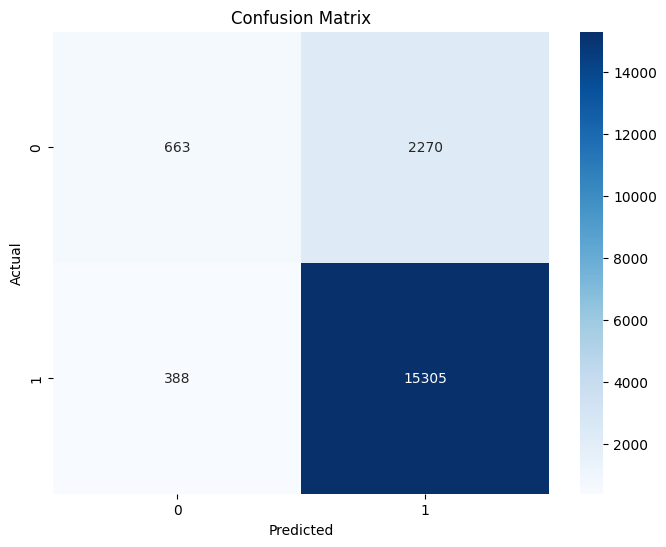

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Confusion Matrix of Random Forest Classifier
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Support Vector Machine

In [131]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

def smiles_to_fingerprint(smiles_list, radius=2, n_bits=2048):
    """
    Convert a list of SMILES strings to Morgan fingerprints.

    Parameters:
    smiles_list (list): List of SMILES strings.
    radius (int): Radius of the Morgan fingerprint. Default is 2.
    n_bits (int): Number of bits in the fingerprint. Default is 2048.

    Returns:
    np.array: Array of fingerprints.
    """
    fingerprints = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
            fingerprints.append(np.array(fingerprint))
        else:
            # Handle invalid SMILES strings
            fingerprints.append(np.zeros(n_bits))
    return np.array(fingerprints)

# Example usage with the given data
data = pd.read_csv('HIV.csv')

# Convert SMILES to fingerprints
x = smiles_to_fingerprint(data['smiles'])
y = data['HIV_active']

# Split the data
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

# Train SVM
svm = SVC()
svm.fit(train_x, train_y)

# Predict and evaluate
y_pred = svm.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)

print(f'Accuracy: {accuracy:.2f}')

[10:42:15] WARNING: not removing hydrogen atom without neighbors
[10:42:15] WARNING: not removing hydrogen atom without neighbors


Accuracy: 0.97
